<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/keras/s3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM deamo

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import numpy as np

X= np.random.rand(1000)
y = 2 * X

poi = int(len(X) * .8)
X_train = X[:poi]
y_train = y[:poi]

X_test = X[poi:]
y_test = y[poi:]

# you have to change your input shape (nb_samples, timesteps, input_dim)
X_train = X_train.reshape(len(X_train), 1, 1)
# and also the output shape (note that the output *shape* is 2 dimensional)
y_train = y_train.reshape(len(y_train), 1)

# Change test data's dimension also.
X_test = X_test.reshape(len(X_test),1,1)
y_test = y_test.reshape(len(y_test),1)


#in_out_neurons = 2
in_out_neurons = 1

hidden_neurons = 300
model = Sequential()
# model.add(Masking(mask_value=0, input_shape=(input_dim,)))
# Remove batch_input_shape and add input_shape = (1,1) - Imp change for Keras 2.0.0
model.add(LSTM(hidden_neurons, return_sequences=False, input_shape=(X_train.shape[1],X_train.shape[2])))
# only specify the output dimension
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()
model.fit(X_train, y_train, epochs=10, validation_split=0.05)

# calculate test set MSE
preds = model.predict(X_test).reshape(len(y_test))
print(preds)
MSE = np.mean((preds-y_test)**2)
print('MSE ', MSE)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________
Train on 760 samples, validate on 40 samples
Epoch 1/10
760/760 [==============================] - 1s 1ms/step - loss: 0.9274 - val_loss: 0.5781
Epoch 2/10
760/760 [==============================] - 0s 459us/step - loss: 0.3745 - val_loss: 0.1945
Epoch 3/10
760/760 [==============================] - 0s 459us/step - loss: 0.1376 - val_loss: 0.1042
Epoch 4/10
760/760 [==============================]

# LSTM test

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 100
filename = 'international-airline-passengers.csv'
footer = 3
look_back=3

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        #print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

model = Sequential()
model.add( LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True) )
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')

In [0]:
# 设置随机种子
np.random.seed(seed)

# 导入数据
data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
dataset = data.values.astype('float32')
# 标准化数据
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
validation_size = len(dataset) - train_size
train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

# 创建dataset，让数据产生相关性
X_train, y_train = create_dataset(train)
X_validation, y_validation = create_dataset(validation)

In [7]:
X_train.shape

(92, 3)

In [0]:
# 将输入转化成为【sample， time steps, feature]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

In [9]:
X_train.shape

(92, 3, 1)

In [12]:
for i in range(2):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    mean_loss = np.mean(history.history['loss'])
    print('mean loss %.5f for loop %s' % (mean_loss, str(i)))
    model.reset_states()

Epoch 1/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 11/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 12/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/100
92/92 [=================

In [0]:
# 模型预测数据
predict_train = model.predict(X_train, batch_size=batch_size)
predict_validation = model.predict(X_validation, batch_size=batch_size)
predict_train_2 = scaler.inverse_transform(predict_train)
y_train_2 = scaler.inverse_transform([y_train])
predict_validation_2 = scaler.inverse_transform(predict_validation)
y_validation_2 = scaler.inverse_transform([y_validation])

In [14]:
# 评估模型
train_score = math.sqrt(mean_squared_error(y_train_2[0], predict_train_2[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
validation_score = math.sqrt(mean_squared_error(y_validation_2[0], predict_validation_2[:, 0]))
print('Validatin Score: %.2f RMSE' % validation_score)

Train Score: 20.10 RMSE
Validatin Score: 55.09 RMSE


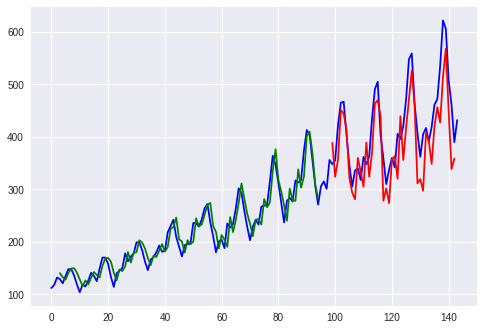

In [15]:
# 构建通过训练集进行预测的图表数据
predict_train_plot = np.empty_like(dataset)
predict_train_plot[:, :] = np.nan
predict_train_plot[look_back:len(predict_train_2) + look_back, :] = predict_train_2

# 构建通过评估数据集进行预测的图表数据
predict_validation_plot = np.empty_like(dataset)
predict_validation_plot[:, :] = np.nan
predict_validation_plot[len(predict_train_2) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation_2

# 图表显示
dataset = scaler.inverse_transform(dataset)
plt.plot(dataset, color='blue')
plt.plot(predict_train_plot, color='green')
plt.plot(predict_validation_plot, color='red')
plt.show()